# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Turning mouse data and study results into a dataframe
mouse_metadata_DF = pd.DataFrame(mouse_metadata)
study_results_DF = pd.DataFrame(study_results)

# Combine the data into a single DataFrame
merged_studydata_DF = pd.merge(study_results_DF, mouse_metadata_DF, on="Mouse ID", how="left")

# Display the data table for preview
merged_studydata_DF.head(21)

In [9]:
# Checking the number of mice.
mice_count = merged_studydata_DF["Mouse ID"].value_counts()
cleaned_mice_count = mice_count.count()
print(cleaned_mice_count)

249


In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ID = merged_studydata_DF.loc[merged_studydata_DF.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 

merged_studydata_DF.loc[merged_studydata_DF["Mouse ID"] == "g989", :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_studydata_DF = merged_studydata_DF[merged_studydata_DF["Mouse ID"].isin(duplicate_ID)==False]
cleaned_studydata_DF.head(275)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
272,q633,5,47.183802,0,Zoniferol,Male,12,25
273,f129,5,47.000594,0,Zoniferol,Female,11,29
274,q483,5,46.776816,1,Ceftamin,Male,6,26
275,a444,5,44.005975,0,Ramicane,Female,10,25


In [13]:
# Checking the number of mice in the clean DataFrame.

New_mice_count = len(cleaned_studydata_DF["Mouse ID"].unique())
print(New_mice_count)

248


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: Dataframe that includes each drug with each  
#mean, median, variance, standard deviation, and SEM of the tumor volume
# Assemble the resulting series into a single summary DataFrame.
mean = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
median = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
var = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
std = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
sem = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()


Summary_Statistics_DF = pd.DataFrame({"Mean Tumor Volume": mean,
                  "Median Tumor Volume": median,
                  "Variance Tumor Volume": var,
                  "Standard Deviation Tumor Volume": std,
                  "SEM Tumor Volume": sem})

Summary_Statistics_DF.head()

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,40.675741,40.675741,40.675741
Ceftamin,52.591172,52.591172,52.591172,52.591172,52.591172
Infubinol,52.884795,52.884795,52.884795,52.884795,52.884795
Ketapril,55.235638,55.235638,55.235638,55.235638,55.235638
Naftisol,54.331565,54.331565,54.331565,54.331565,54.331565


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_method = Summary_Statistics_DF(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_method.head()

TypeError: 'DataFrame' object is not callable

## Bar and Pie Charts

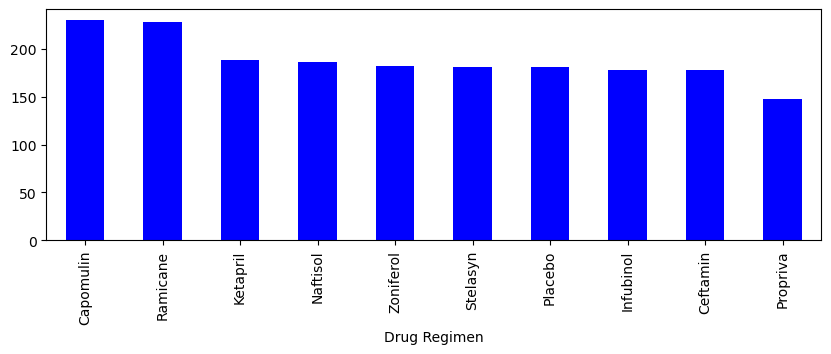

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

TPs_to_DR = cleaned_studydata_DF["Drug Regimen"].value_counts()
TPs_to_DR_graph = TPs_to_DR.plot(kind="bar", facecolor="blue", figsize=(10,3))



plt.show()

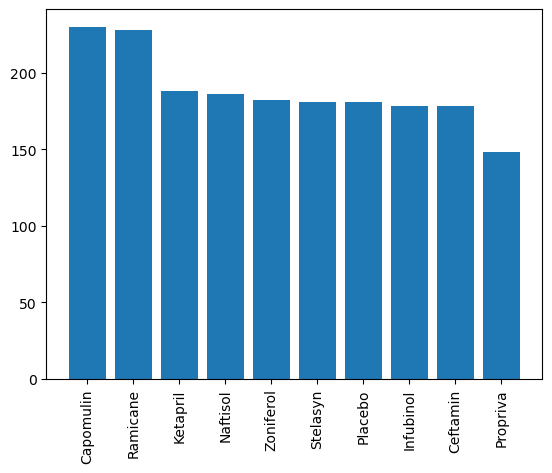

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# x_axis = np.arange(len(cleaned_studydata_DF))
# tick_location = [value for value in x_axis]

# plt.figure(figsize=(12,10))
# plt.bar(cleaned_studydata_DF["Drug Regimen"].value_counts(), cleaned_studydata_DF["Drug Regimen"].value_counts().values, color="b", alpha=1)
# plt.xticks(tick_location, cleaned_studydata_DF["Mouse ID"], rotation="vertical")
data =cleaned_studydata_DF['Drug Regimen'].value_counts()
plt.bar(data.index.values, data.values)
plt.xticks(rotation=90)

plt.xlabel=("Drug Regimen")
plt.ylabel=("Number of Observed Timepoints")
plt.title=("Observed Timepoints per Regimen with Myplot")
plt.show()

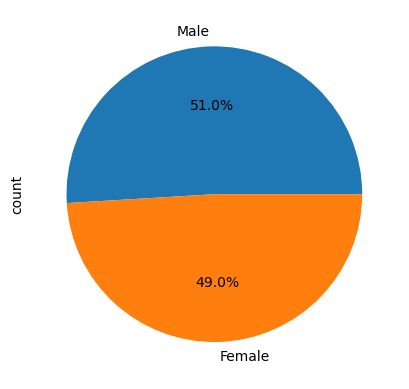

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

data = cleaned_studydata_DF['Sex'].value_counts()

#Mmice_to_Fmice_graph = Mmice_to_Fmice.plot(kind="pie", facecolor="blue", figsize=(10,3))
#plt.title("Observed Timepoints per Drug Regimen with Pandas")
data.plot(kind="pie", autopct="%1.1f%%")
plt.show()

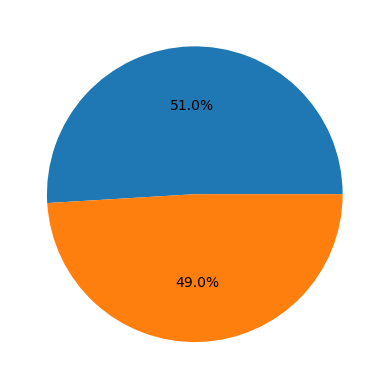

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data = cleaned_studydata_DF['Sex'].value_counts()

#Mmice_to_Fmice_graph = Mmice_to_Fmice.plot(kind="pie", facecolor="blue", figsize=(10,3))
#plt.title("Observed Timepoints per Drug Regimen with Pandas")
plt.pie(data, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Final_mouse = cleaned_studydata_DF.groupby(["Mouse ID"])["Timepoint"].max()
Focus_mouse_DF = Final_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merged_studydata_DF = Focus_mouse_DF.merge(cleaned_studydata_DF, on=["Mouse ID", "Timepoint"], how="left")
Merged_studydata_DF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [36]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

Tumor_Vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for Drug in Treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = Merged_studydata_DF.loc[Merged_studydata_DF["Drug Regimen"]== Drug, "Tumor Volume (mm3)"]
    
    # add subset
    Tumor_Vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 48.72207785
The upper quartile of occupancy is: 64.29983003
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


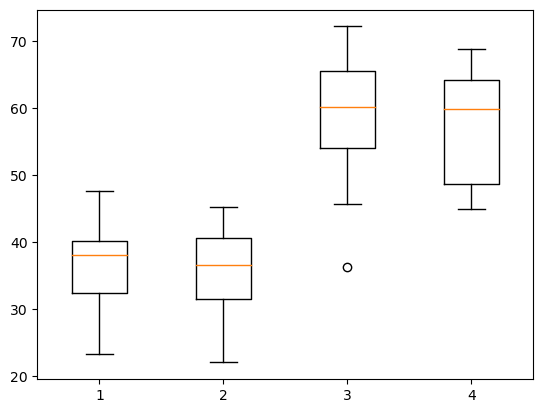

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(Tumor_Vol)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

## Answer = The correlation between mouse weight and the average tumor volume is 0.84